In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
from prophet import Prophet 
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics, cross_validation

In [108]:
df = pd.read_csv('../clean_data/BRISTOR_Zegoland_all_%.csv')

df = df.drop(columns=['Data_type', 'Measure', 'Country', 'Product', 'voiceShareA', 'voiceShareB'])



In [214]:
df_train = df[df['Date'] < '2023-11-01']
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                24 non-null     object 
 1   Value               24 non-null     float64
 2   demandA             24 non-null     float64
 3   demandB             24 non-null     float64
 4   demandCompA         24 non-null     float64
 5   DemandShareA        24 non-null     float64
 6   newPatientShareA    24 non-null     float64
 7   newPatientShareB    24 non-null     float64
 8   totalPatientShareA  24 non-null     float64
 9   totalPatientShareB  24 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB
None


In [215]:
df_test = df[df['Date'] >= '2023-11-01']
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 24 to 30
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                7 non-null      object 
 1   Value               7 non-null      float64
 2   demandA             7 non-null      float64
 3   demandB             7 non-null      float64
 4   demandCompA         7 non-null      float64
 5   DemandShareA        7 non-null      float64
 6   newPatientShareA    7 non-null      float64
 7   newPatientShareB    7 non-null      float64
 8   totalPatientShareA  7 non-null      float64
 9   totalPatientShareB  7 non-null      float64
dtypes: float64(9), object(1)
memory usage: 616.0+ bytes
None


In [216]:
df_test.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)
df_test.head(5)

/var/folders/vp/3088hxcd4dv_l_s0vtn_l2q80000gn/T/ipykernel_21935/1889246356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)


,ds,y,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
24,2023-11-01,100782.78,99170.401686,426.660766,3.862052e+06,0.025035,0.05,0.033,0.03,0.013
25,2023-12-01,96628.98,92128.061740,510.902080,3.600938e+06,0.024946,0.04,0.029,0.03,0.012
26,2024-01-01,109284.96,105609.366866,490.508487,3.954515e+06,0.026011,0.04,0.021,0.03,0.012
27,2024-02-01,87933.60,99594.883198,448.705210,3.732976e+06,0.025986,0.05,0.022,0.03,0.013
28,2024-03-01,91203.28,100535.360644,423.473075,3.617622e+06,0.027039,0.05,0.032,0.03,0.013


In [217]:
df_train.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)

/var/folders/vp/3088hxcd4dv_l_s0vtn_l2q80000gn/T/ipykernel_21935/3110268531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'Date':'ds', 'Value':'y'}, inplace=True)


In [218]:
model = Prophet()
#model.add_regressor('demandB', standardize=True)
#model.add_regressor('demandA', standardize=True)
#model.add_regressor('demandCompA', standardize=True)
#model.add_regressor('DemandShareA', standardize=False)
#model.add_regressor('newPatientShareA', standardize=True)
#model.add_regressor('newPatientShareB', standardize=True)
model.add_regressor('totalPatientShareA', standardize=True)
#model.add_regressor('totalPatientShareB', standardize=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=3, prior_scale=0.1)


model.fit(df_train)

01:29:12 - cmdstanpy - INFO - Chain [1] start processing
01:29:12 - cmdstanpy - INFO - Chain [1] done processing


In [219]:
df_test2 = df_test.drop(columns=['y'])
df_test2.head(10)

,ds,demandA,demandB,demandCompA,DemandShareA,newPatientShareA,newPatientShareB,totalPatientShareA,totalPatientShareB
24,2023-11-01,99170.401686,426.660766,3.862052e+06,0.025035,0.05,0.033,0.03,0.013
25,2023-12-01,92128.061740,510.902080,3.600938e+06,0.024946,0.04,0.029,0.03,0.012
26,2024-01-01,105609.366866,490.508487,3.954515e+06,0.026011,0.04,0.021,0.03,0.012
27,2024-02-01,99594.883198,448.705210,3.732976e+06,0.025986,0.05,0.022,0.03,0.013
28,2024-03-01,100535.360644,423.473075,3.617622e+06,0.027039,0.05,0.032,0.03,0.013
29,2024-04-01,109092.158318,592.564658,4.003511e+06,0.026526,0.04,0.028,0.03,0.013
30,2024-05-01,105207.579379,508.419308,3.693297e+06,0.027697,0.04,0.028,0.03,0.014


In [220]:
forecast1 = model.predict(df_test2)
forecast1 = forecast1[['ds', 'yhat']]
forecast1.head(10)

,ds,yhat
0,2023-11-01,87892.922070
1,2023-12-01,88652.266145
2,2024-01-01,90734.517825
3,2024-02-01,92793.579278
4,2024-03-01,92273.150783
5,2024-04-01,94335.457657
6,2024-05-01,95114.746539


In [221]:
#calculate RMSE

y = df_test['y'].values
yhat = forecast1['yhat'].values

sumerror= 0
for i in range(len(y)):
    sumerror += (y[i] - yhat[i])**2

rmse = np.sqrt(sumerror/len(y))
    
print(rmse)

10330.507525420517


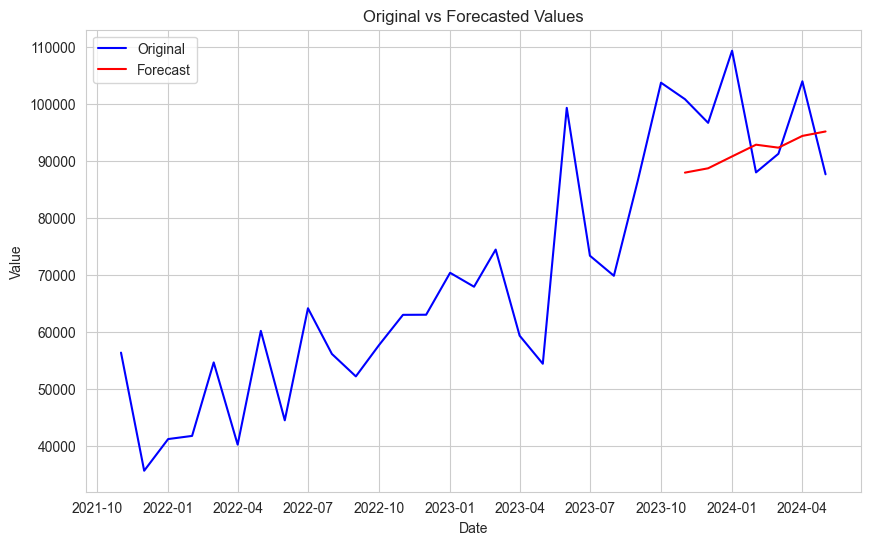

In [223]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
forecast1['ds'] = pd.to_datetime(forecast1['ds'])

# Ensure the data aligns properly
plt.figure(figsize=(10, 6))

# Plot the original values (test set)
plt.plot(df['Date'], df['Value'], label='Original', color='blue')

# Plot the forecasted values
plt.plot(forecast1['ds'], forecast1['yhat'], label='Forecast', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original vs Forecasted Values')
plt.legend()

# Show the plot
plt.show()


